# Data preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv('Position_Salaries.csv')

In [3]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
features=['Level']
X= data[features]
y= data.Salary

# Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
sc_y= StandardScaler()
X= sc_x.fit_transform(X)
y=np.array(y)
y = np.squeeze(sc_y.fit_transform(y.reshape(-1, 1)))

# Fitting the model

In [6]:
from sklearn.svm import SVR
regressor= SVR(kernel='rbf')
regressor.fit(X,y)

SVR()

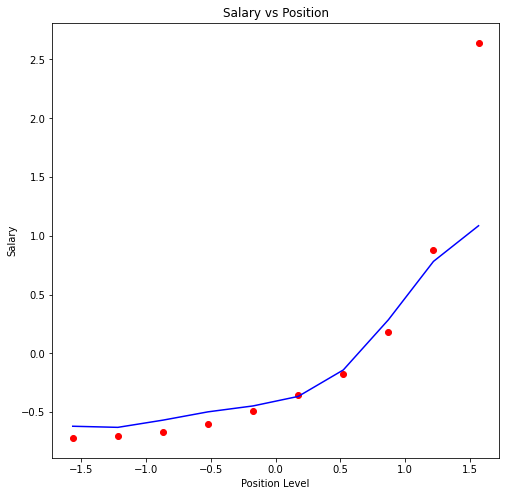

In [7]:
plt.figure(figsize=(8,8))
plt.scatter(X,y,color='red')
plt.plot(X,regressor.predict(X),color='blue')
plt.title('Salary vs Position')
plt.ylabel('Salary')
plt.xlabel('Position Level')
plt.show()

In [8]:
pred = sc_y.inverse_transform(regressor.predict(sc_x.transform(np.array([[6.5]]))))

In [9]:
pred

array([170370.0204065])

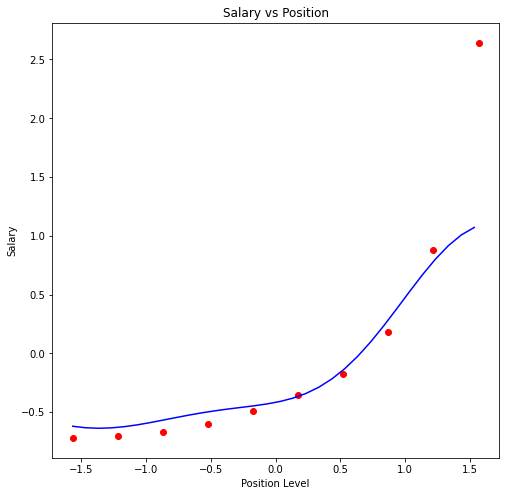

In [10]:
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.figure(figsize=(8,8))
plt.scatter(X,y,color='red')
plt.plot(X_grid,regressor.predict(X_grid),color='blue')
plt.title('Salary vs Position')
plt.ylabel('Salary')
plt.xlabel('Position Level')
plt.show()